# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# drive.mount('/content/gdrive/', force_remount = True)

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [4]:
df = pd.read_csv("fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/cg/whvlhq7j7tz0rkdw06y24sjm0000gn/T/ipykernel_51300/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/cg/whvlhq7j7tz0rkdw06y24sjm0000gn/T/ipykernel_51300/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [12]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [15]:
over_log.score(X_test, y_test)

0.9388780920847429

In [16]:
under_log.score(X_test, y_test)

0.925406079800379

In [17]:
smote_log.score(X_test, y_test)

0.9376424578324816

In [18]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [19]:
# Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix


In [21]:
y_true = y_test

In [22]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[78041,  5014],
       [   81,   222]])

In [23]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7326732673267327


In [24]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76917,  6138],
       [   80,   223]])

In [25]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.735973597359736


In [26]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77938,  5117],
       [   81,   222]])

In [27]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7326732673267327


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [28]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], ignore_index= False, axis =1)

In [29]:
raw_temp.columns = list(X.columns) + ["is_fraud"]

In [30]:
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,0.144646,-0.290006,-0.085238,-0.27874,-0.275065,-0.336295,-0.190350,-0.323295,-0.265814,-0.322897,3.224907,-0.227328,-0.257174,-0.275967,-0.285532,-0.313605,-0.179961,0.0
1,1.899717,-0.274609,-0.836491,-0.27874,-0.275065,-0.336295,-0.190350,-0.323295,-0.265814,-0.322897,-0.310086,-0.227328,-0.257174,-0.275967,-0.285532,3.188727,-0.179961,NaN
2,-0.086483,2.208590,-0.720913,-0.27874,-0.275065,-0.336295,5.253471,-0.323295,-0.265814,-0.322897,-0.310086,-0.227328,-0.257174,-0.275967,-0.285532,-0.313605,-0.179961,0.0
3,0.085629,2.197024,1.186113,-0.27874,-0.275065,2.973583,-0.190350,-0.323295,-0.265814,-0.322897,-0.310086,-0.227328,-0.257174,-0.275967,-0.285532,-0.313605,-0.179961,NaN
4,-0.043408,-0.177847,-0.720913,-0.27874,-0.275065,-0.336295,-0.190350,-0.323295,-0.265814,-0.322897,3.224907,-0.227328,-0.257174,-0.275967,-0.285532,-0.313605,-0.179961,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
425559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
501172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
480764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


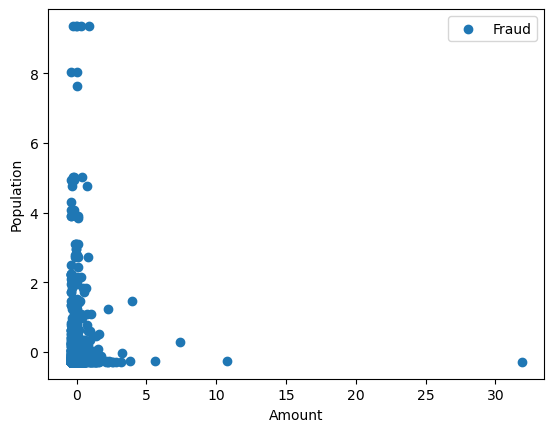

In [31]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [32]:
raw_temp = pd.concat([pd.DataFrame(raw_temp, columns = X.columns), pd.DataFrame(smote_y, columns = ["is_fraud"])], axis = 1)    

In [33]:
raw_temp.columns = list(X.columns) + ["is_fraud"]

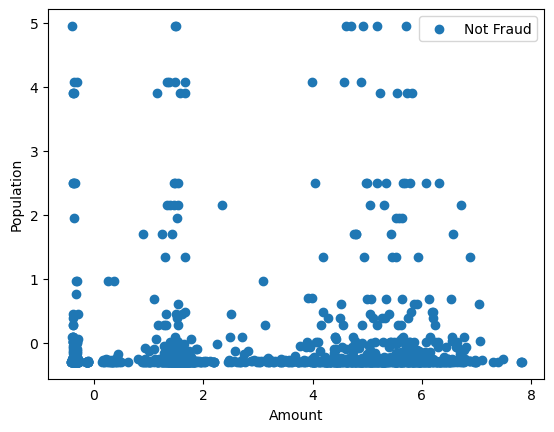

In [34]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [37]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty = "l1", C = .5, solver = "liblinear"), 
    "DicisionTree" : DecisionTreeClassifier()
}

In [38]:
trained_models = {}

In [39]:
def calc_perf_metrics(y_true, y_pred):
    

    tn, fn, fp, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp / (tp + fp)
  

    

In [40]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_name, model in model_configs.items():
        combined_key = f"{resample_key}_{model_name}"
        trained_models[combined_key] = model.fit(resample_X, resample_y)
        
        # turn the performance metrics of different models into a dataframe
        df = pd.DataFrame()
        df['model'] = [combined_key]
        df['accuracy'] = [trained_models[combined_key].score(X_test, y_test)]
        y_pred = trained_models[combined_key].predict(X_test)
        y_true = y_test

        # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        # df['precision'] = tp / (tp + fp)
        # df['recall'] = tp / (tp + fn)
        # df['f1'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])
        
        df['precision'] = [precision_score(y_true, y_pred)]
        df['recall'] = [recall_score(y_true, y_pred)]
        df['f1'] = [f1_score(y_true, y_pred)]
      
        # print(df, index = False)
        # print the dataframe without index
        print(df.to_string(index=False))
        print("-----")
        

        
        
    

   model  accuracy  precision   recall       f1
over_LOG  0.938122   0.041895 0.732673 0.079257
-----
     model  accuracy  precision   recall       f1
over_LASSO  0.938146   0.041911 0.732673 0.079286
-----
            model  accuracy  precision   recall       f1
over_DicisionTree  0.996989   0.584416 0.594059 0.589198
-----
    model  accuracy  precision   recall       f1
under_LOG  0.935663   0.040167 0.729373 0.076141
-----
      model  accuracy  precision   recall       f1
under_LASSO  0.936995   0.040994 0.729373 0.077626
-----
             model  accuracy  precision   recall       f1
under_DicisionTree  0.942201   0.056047 0.940594 0.105791
-----
    model  accuracy  precision   recall       f1
smote_LOG  0.936743   0.041005 0.732673 0.077663
-----
      model  accuracy  precision   recall       f1
smote_LASSO  0.936743   0.041005 0.732673 0.077663
-----
             model  accuracy  precision   recall      f1
smote_DicisionTree  0.991794   0.270205 0.739274 0.39576
-----


From the accuracy and f1 score the dicision tree model with resample by oversampling or SMOTE is much better than the others. The recall of SMOTE-dicision tree is higher and the precision of oversampling-decision tree is higher. Considering that it's a prediciton on fraud, I think it's more important to have a higher recall (I would rather it's a wrong warning than losing money). In all, the SMOTE-dicision tree is better.